In [81]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from matplotlib.pyplot import gca
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
%matplotlib inline


# 前提

**困ったらドキュメントを読む**
- 確かにmatplotlibのドキュメントはトリッキーだが読む

**オブジェクト指向で実装**  
- matplotlibにはオブジェクト指向での書き方とpyplotでの書き方の2種類がある  (https://matplotlib.org/tutorials/introductory/lifecycle.html#a-note-on-the-object-oriented-api-vs-pyplot)
- メンテナンスのし易さなどのメリットがあるので、基本オブジェクト指向で書く
-  axisなどの概念を理解すれば、　　ググり方のコツもわかってくる
- このqiitaが非常にわかりやすい  (https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9)

# フォントの設定


以下のような事象を想定して、あえて直pathでフォントを指定している

- 共有サーバーのfontを管理しているディレクトリに権限がない
- 分析官同士でフォントを統一するために、gitに共通フォントをpushし共有


また、[japanize-matplotlib](https://github.com/uehara1414/japanize-matplotlib)という便利パッケージもあるのでご参考ください。  
(だいぶ前の記憶だが、これを使おうとしたが共通サーバーのfontを管理しているdirに権限がなくこけた。個人開発ならばこのライブラリで事足りる)

今回はfont_manegerを使う  
分からないこおとがあればドキュメントに当たってください。  
https://matplotlib.org/api/font_manager_api.html#matplotlib.font_manager.FontProperties

In [2]:
font = fm.FontProperties(fname='./TakaoPGothic.ttf')

# データの読み込み

signateの【練習問題】お弁当の需要予測のtrain.csvを利用  
データは各自でダウンロードしてください  

https://signate.jp/competitions/24

In [3]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(207, 12)


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


# 棒グラフ

In [4]:
df_week_y = df.groupby(['week'])['y'].sum().reset_index()
df_week_y['y'] = df_week_y['y']*10000
df_week_y

,week,y
0,月,36680000
1,木,34040000
2,水,37190000
3,火,35580000
4,金,35820000


matplotlib  	

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.bar.html

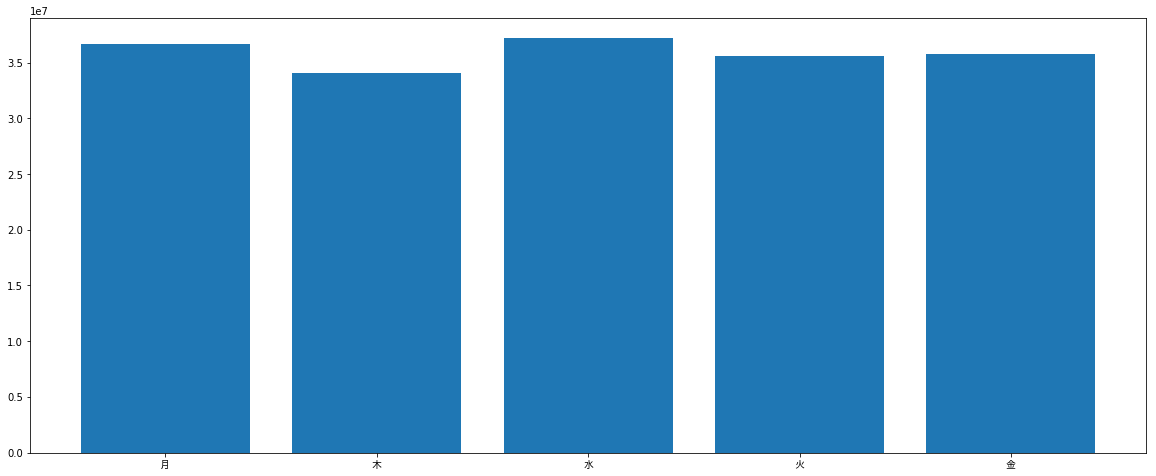

In [5]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
ax.bar(df_week_y['week'], df_week_y['y'])
ax.set_xticklabels(df_week_y['week'], fontproperties=font)
plt.show()

# 軸にラベルをつける

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html

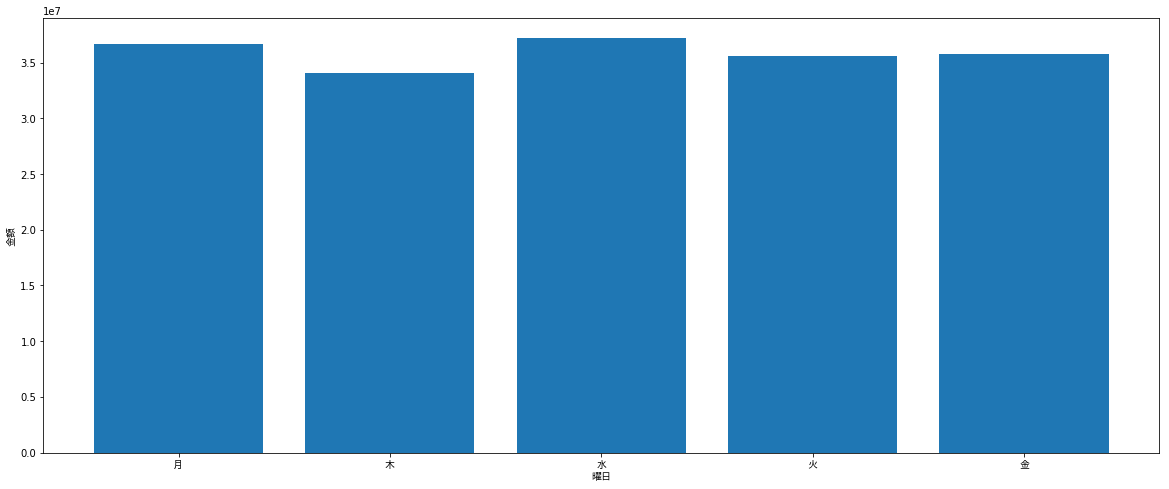

In [6]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
ax.bar(df_week_y['week'], df_week_y['y'])
ax.set_xticklabels(df_week_y['week'], fontproperties=font)
ax.set_xlabel('曜日', fontproperties=font, fontsize=20)
ax.set_ylabel('金額', fontproperties=font, fontsize=20)
plt.show()

# 指数型で表示するか

matplotlibでは値が大きいと勝手に指数表示になる  
そこで `matplotlib.axes.Axes.ticklabel_format` で`style`を `{'sci' (or 'scientific'), 'plain'} `に指定することで明示的に変更できる

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.ticklabel_format.html#matplotlib-axes-axes-ticklabel-format


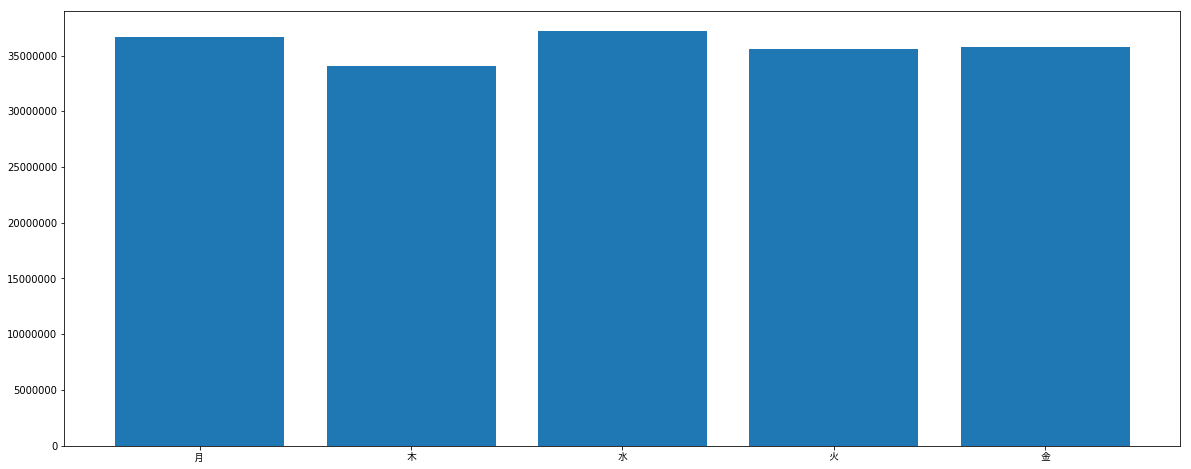

In [7]:
# 指数表示を明示的になしにする
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
ax.bar(df_week_y['week'], df_week_y['y'])
ax.set_xticklabels(df_week_y['week'], fontproperties=font)
ax.ticklabel_format(axis='y', style='plain')
plt.show()

# 軸の文字を大きくする

2つ方法がある
(1)`set_xticklabels` or `set_yticklabels` のfontsizeで指定  (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html)  
(2) `tick_params` で変更  (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.tick_params.html)  

個人的には汎用性の高い(2)を推奨

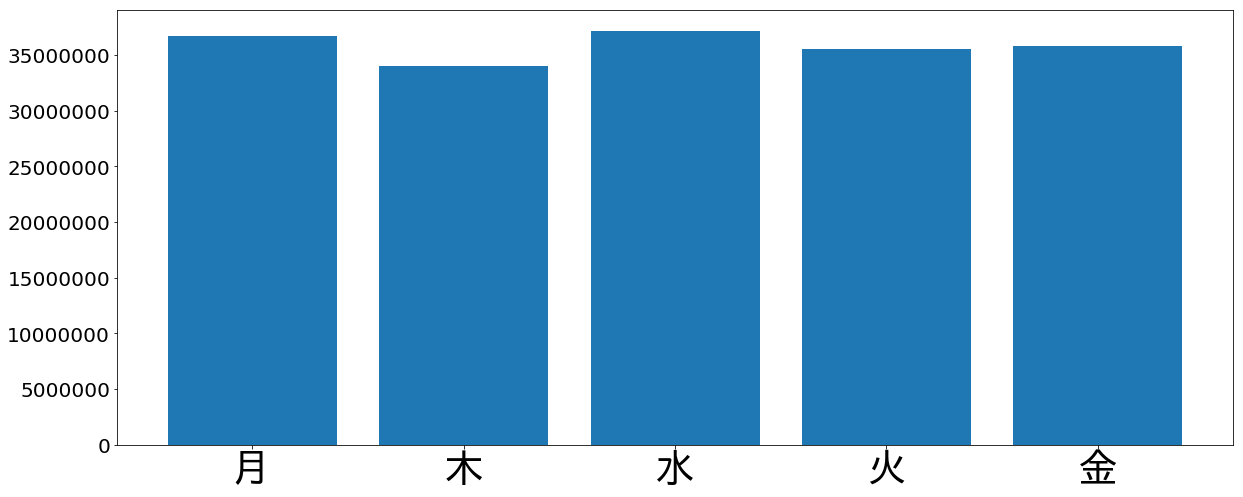

In [8]:

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
ax.bar(df_week_y['week'], df_week_y['y'])
ax.set_xticklabels(df_week_y['week'], fontproperties=font)
# これでもok
#ax.set_xticklabels(df_week_y['week'], fontproperties=font, fontsize=20)

# tick_paramsで変更
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=20)
ax.ticklabel_format(axis='y', style='plain')
plt.show()

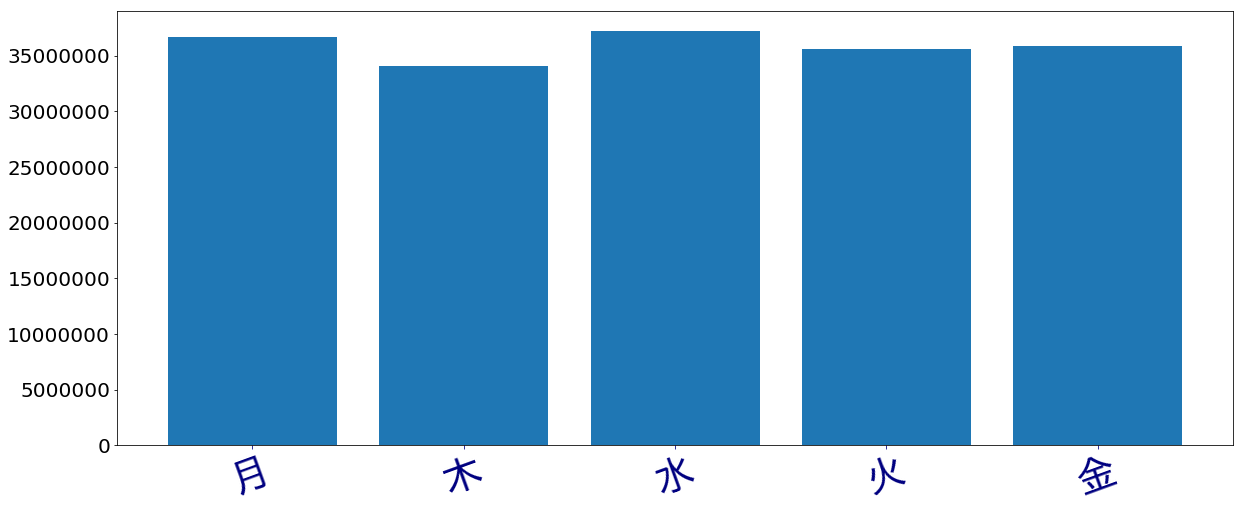

In [9]:
# こんな感じで自由が効く
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
ax.bar(df_week_y['week'], df_week_y['y'])
ax.set_xticklabels(df_week_y['week'], fontproperties=font)
ax.tick_params(axis='x', labelsize=40, colors = 'navy', labelrotation=20)
ax.tick_params(axis='y', labelsize=20)
ax.ticklabel_format(axis='y', style='plain')
plt.show()

# 横軸の並び順を変更

色々試したが、元データを表示したい順番にあらかじめ並べ替えておくのが楽

In [10]:
order_week = ['月', '火', '水', '木', '金']
mapping = {week: i for i, week in enumerate(order_week)}
key = df_week_y['week'].map(mapping)
df_week_y.iloc[key.argsort()]
df_week_y

,week,y
0,月,36680000
1,木,34040000
2,水,37190000
3,火,35580000
4,金,35820000


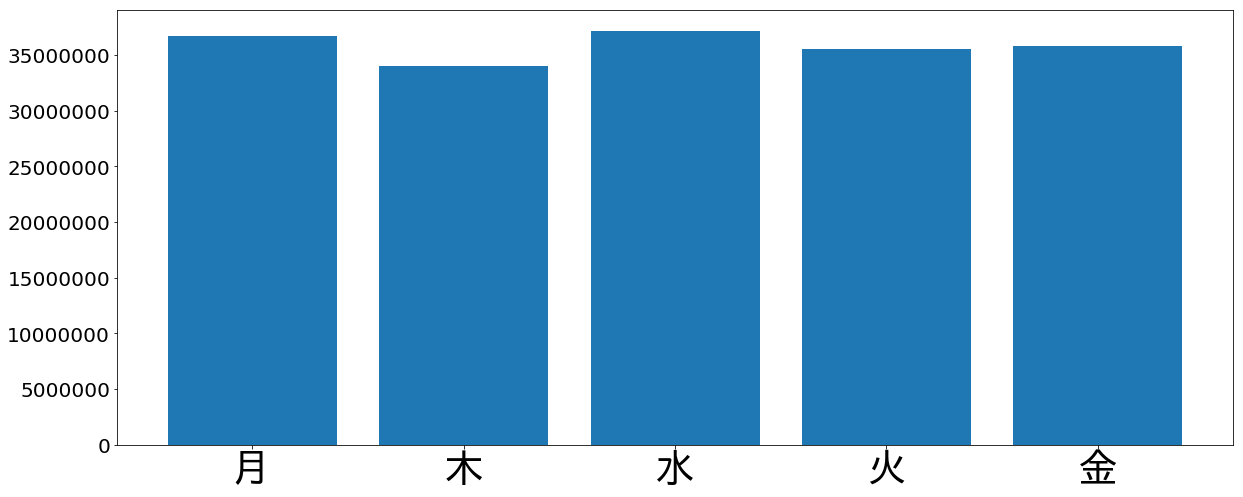

In [11]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
ax.bar(df_week_y['week'], df_week_y['y'])
ax.set_xticklabels(df_week_y['week'], fontproperties=font)
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=20)
ax.ticklabel_format(axis='y', style='plain')
plt.show()

# 棒グラフの上に数字をつける

https://matplotlib.org/api/text_api.html#matplotlib.text.Text を使う  
x,yはともかくsはなんぞやとなると思うだろうが、textオブジェクトのリンクを踏むとhttps://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_text に飛ばされてやっとsの意味がわかると思う  
また、yに値を足しているのは棒グラフよりもちょっと上に表示してほしいので若干値を足している。  
`horizontalalignment=center` にしないと数字が中央に出ない

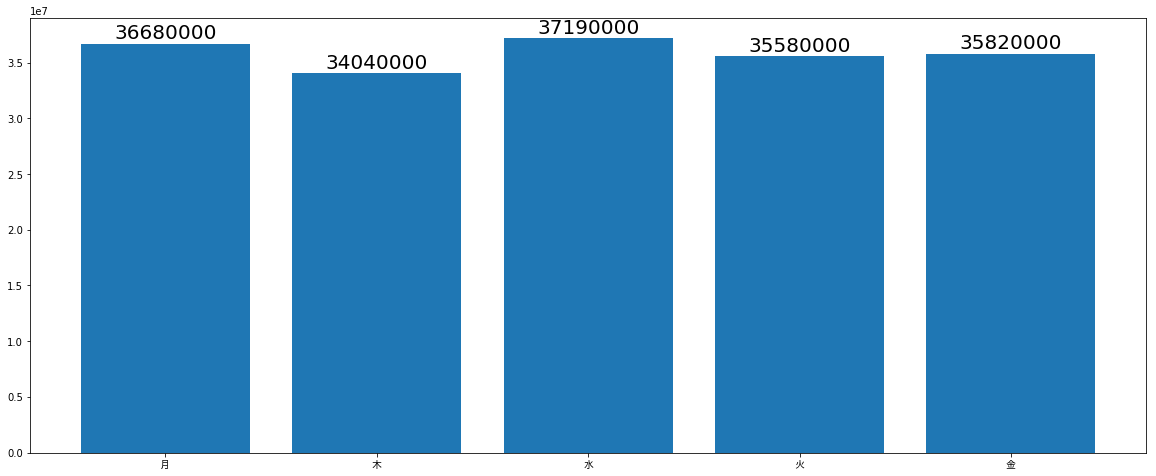

In [12]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
ax.bar(df_week_y['week'], df_week_y['y'])
ax.set_xticklabels(df_week_y['week'], fontproperties=font)
for i in range(len(df_week_y)):
    ax.text(
        x=df_week_y['week'][i],
        y=df_week_y['y'][i] + (df_week_y['y'][i]) / 80,
        s=df_week_y['y'][i],
        horizontalalignment='center',
        size=20)
plt.show()

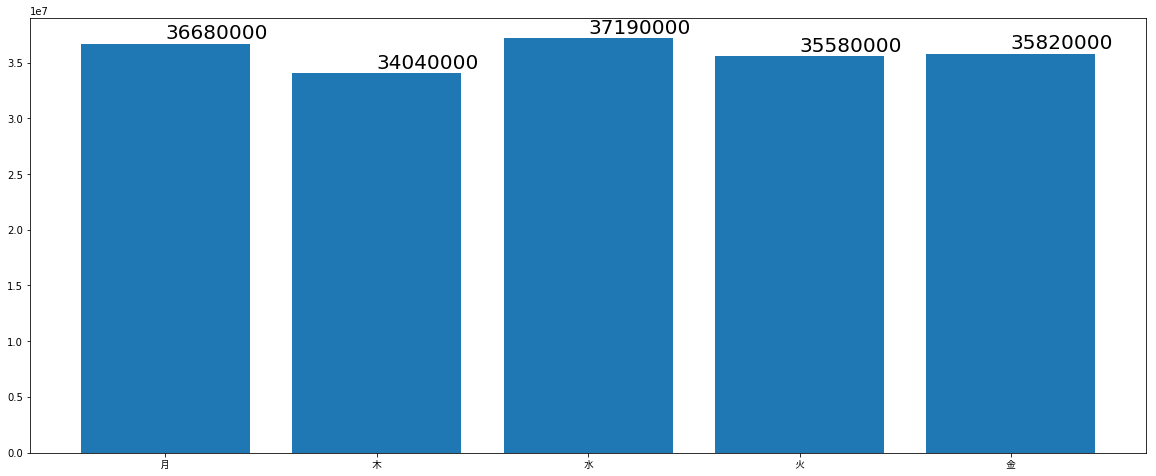

In [13]:
# horizontalalignmentを指定しないと横にずれる
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
ax.bar(df_week_y['week'], df_week_y['y'])
ax.set_xticklabels(df_week_y['week'], fontproperties=font)
for i in range(len(df_week_y)):
    ax.text(
        x=df_week_y['week'][i],
        y=df_week_y['y'][i] + (df_week_y['y'][i]) / 80,
        s=df_week_y['y'][i],
        size=20)
plt.show()

# 積み上げ棒グラフ

基本方針としては、weatherごとにデータを抽出し、bottomを用いて重ねていく方針  
ただし、データの持ち方に癖がある。(1時間くらい試行錯誤しました、、、)  
ある天気に対してデータが存在しない曜日の値を無理やりNaNで埋めるために、pivotをかましている。  
さらに、(week, weather)　で持ちたいので、特定の天気について抜き出した後に、さらに転置を噛ませている

In [14]:
df_week_weather_y = df.groupby(['week', 'weather'])['y'].sum().reset_index()
df_week_weather_y

,week,weather,y
0,月,快晴,921
1,月,晴れ,771
2,月,曇,1390
3,月,薄曇,430
4,月,雨,156
5,木,快晴,812
6,木,晴れ,439
7,木,曇,984
8,木,薄曇,402
9,木,雨,713


In [15]:
df_week_weather_y = df.groupby(['week', 'weather'])['y'].sum().reset_index()
df_week_weather_y_piv = df_week_weather_y.pivot_table(index='weather', columns='week', values='y').reset_index()
df_week_weather_y_piv = df_week_weather_y_piv.fillna(0)
df_week_weather_y_piv

week,weather,月,木,水,火,金
0,快晴,921.0,812.0,907.0,1443.0,1393.0
1,晴れ,771.0,439.0,803.0,870.0,1066.0
2,曇,1390.0,984.0,1075.0,628.0,483.0
3,薄曇,430.0,402.0,389.0,318.0,324.0
4,雨,156.0,713.0,545.0,299.0,230.0
5,雪,0.0,0.0,0.0,0.0,86.0
6,雷電,0.0,54.0,0.0,0.0,0.0


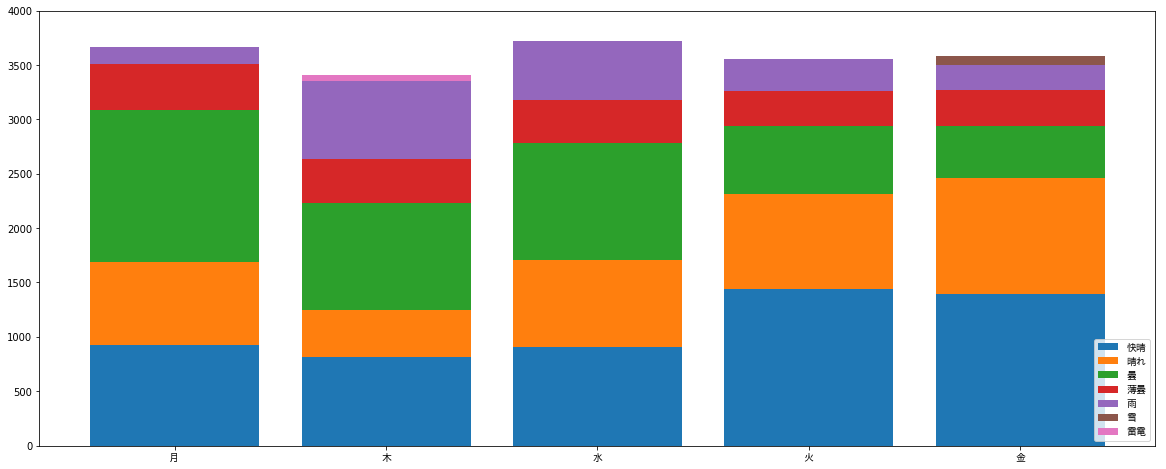

In [16]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
y_old = 0
for i, weather in enumerate(df_week_weather_y_piv['weather']):
    # あるweatherを持つ行を抽出し、(week, y)の2列に変換
    df_tmp = df_week_weather_y_piv[df_week_weather_y_piv['weather'] == weather].drop('weather', axis=1).T.reset_index()
    df_tmp.columns = ['week', 'y']
    ax.bar(
        df_tmp['week'],
        df_tmp['y'],
        label=weather,
        bottom=y_old)
    y_old += df_tmp['y']

ax.legend(prop=font)
ax.set_xticklabels(df_tmp['week'], fontproperties=font)
ax.set_ylim(0, 4000)

plt.show()

# カラーマップの指定について

## 自分で色を指定する場合

RGBで指定する技もあるが予約語を使う方が無難  
https://matplotlib.org/gallery/color/named_colors.html

In [17]:
len(df_week_weather_y_piv['weather'].unique())

7

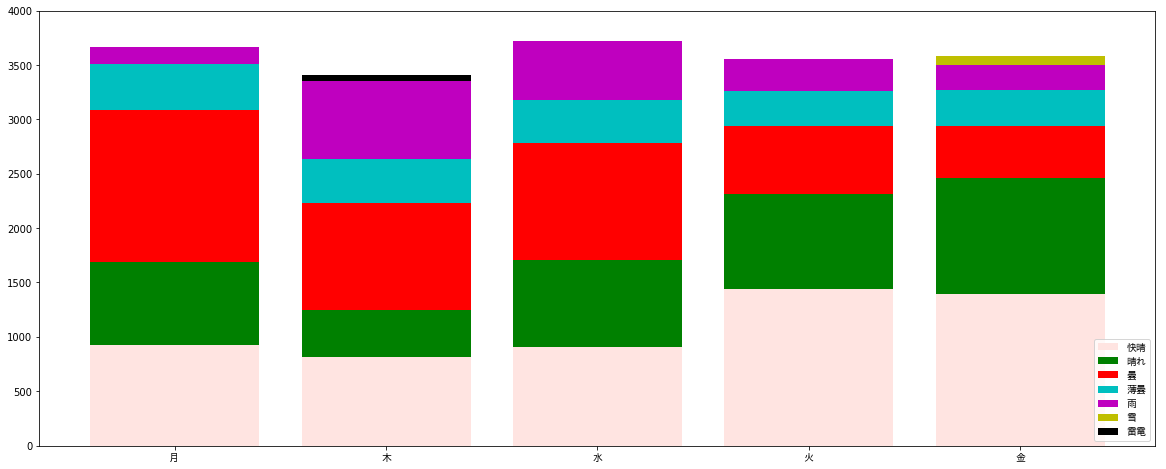

In [18]:
colors = ['mistyrose', 'g', 'r', 'c', 'm', 'y', 'k',]
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
y_old = 0
for i, weather in enumerate(df_week_weather_y_piv['weather']):
    # あるweatherを持つ行を抽出し、(week, y)の2列に変換
    df_tmp = df_week_weather_y_piv[df_week_weather_y_piv['weather'] == weather].drop('weather', axis=1).T.reset_index()
    df_tmp.columns = ['week', 'y']
    ax.bar(
        df_tmp['week'],
        df_tmp['y'],
        label=weather,
        bottom=y_old,
        color=colors[i])
    y_old += df_tmp['y']

ax.legend(prop=font)
ax.set_xticklabels(df_tmp['week'], fontproperties=font)
ax.set_ylim(0, 4000)

plt.show()

## styleで指定する場合

ここに載っているものから好きなものを使う  
https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

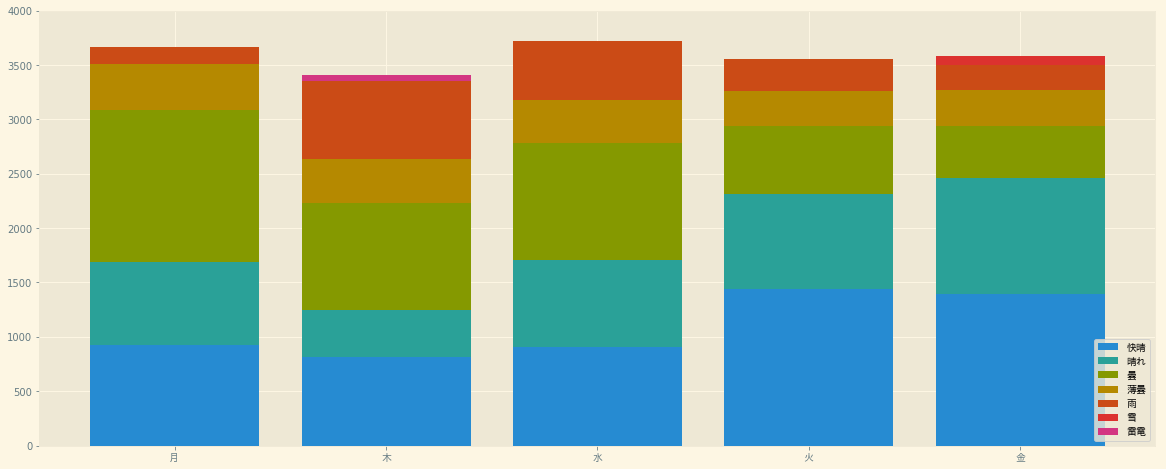

In [19]:
plt.style.use('Solarize_Light2')

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
y_old = 0
for i, weather in enumerate(df_week_weather_y_piv['weather']):
    # あるweatherを持つ行を抽出し、(week, y)の2列に変換
    df_tmp = df_week_weather_y_piv[df_week_weather_y_piv['weather'] == weather].drop('weather', axis=1).T.reset_index()
    df_tmp.columns = ['week', 'y']
    ax.bar(
        df_tmp['week'],
        df_tmp['y'],
        label=weather,
        bottom=y_old)
    y_old += df_tmp['y']

ax.legend(prop=font)
ax.set_xticklabels(df_tmp['week'], fontproperties=font)
ax.set_ylim(0, 4000)

plt.show()

In [20]:
# defalutに戻す
plt.style.use('default')

## 離散カラーマップを用いる場合

Qualitative coloermapsを使う  
https://matplotlib.org/examples/color/colormaps_reference.html  
cmapを指定してcmapのi番目との指定の仕方をすると良い  
個人的にはtab10かtab20を使うのが無難だと思っている

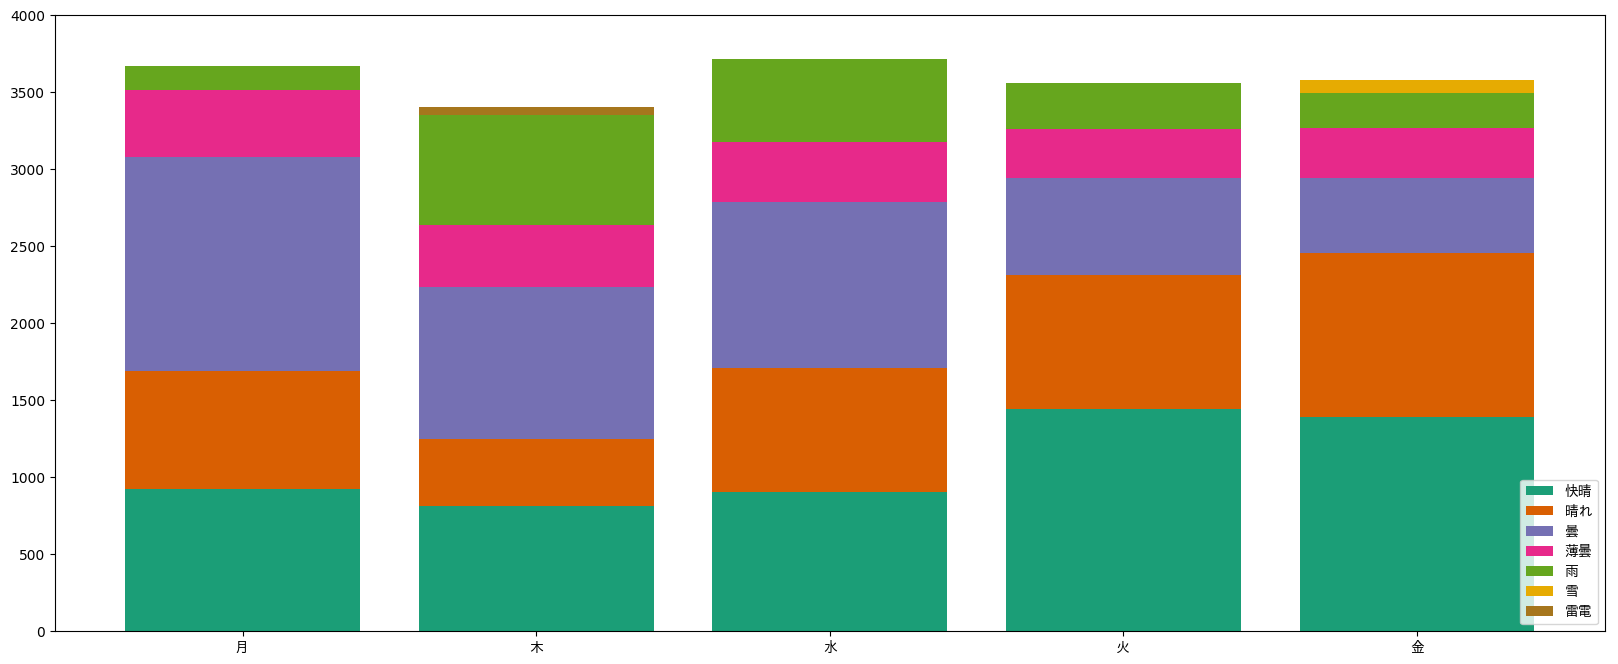

In [21]:
cmap = plt.get_cmap('Dark2')
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
y_old = 0
for i, weather in enumerate(df_week_weather_y_piv['weather']):
    # あるweatherを持つ行を抽出し、(week, y)の2列に変換
    df_tmp = df_week_weather_y_piv[df_week_weather_y_piv['weather'] == weather].drop('weather', axis=1).T.reset_index()
    df_tmp.columns = ['week', 'y']
    ax.bar(
        df_tmp['week'],
        df_tmp['y'],
        label=weather,
        color=cmap(i),
        bottom=y_old)
    y_old += df_tmp['y']

ax.legend(prop=font)
ax.set_xticklabels(df_tmp['week'], fontproperties=font)
ax.set_ylim(0, 4000)

plt.show()

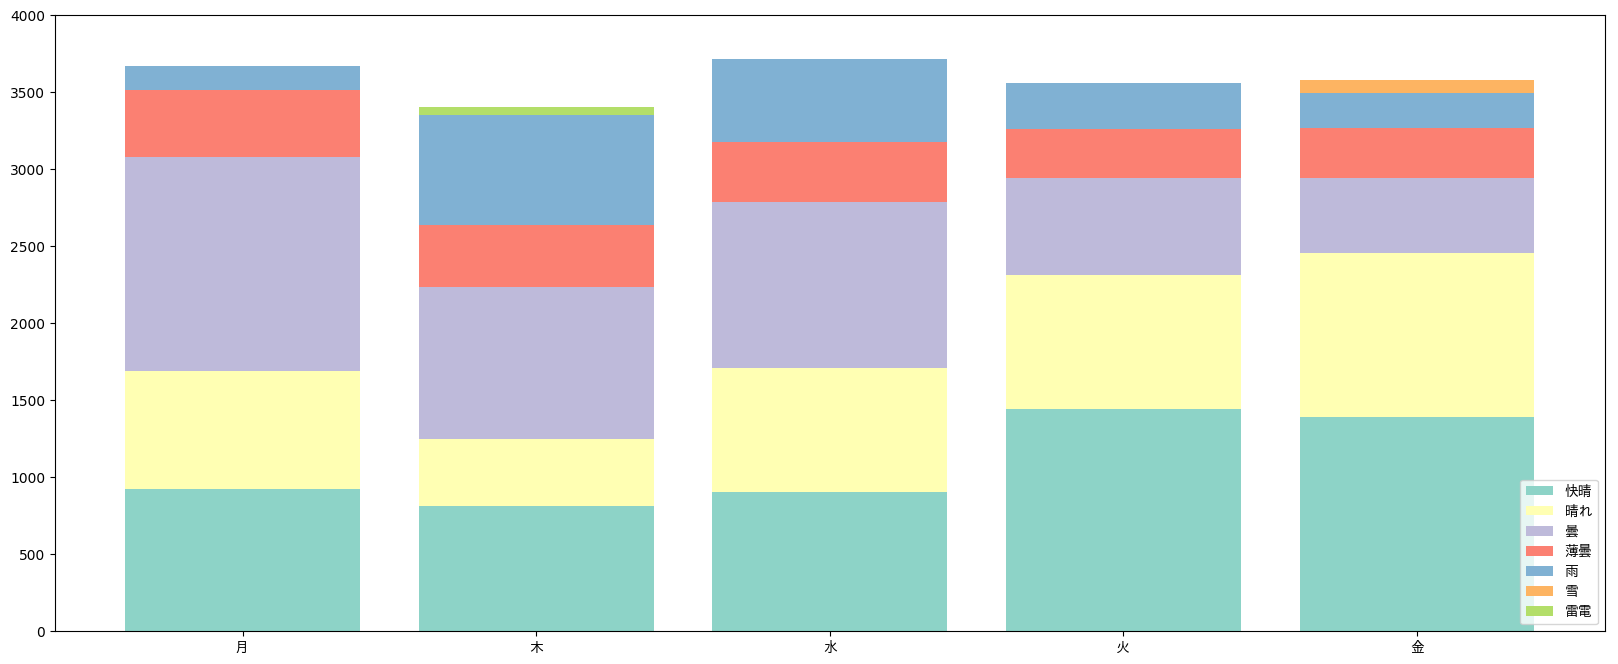

In [22]:
cmap = plt.get_cmap('Set3')
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
y_old = 0
for i, weather in enumerate(df_week_weather_y_piv['weather']):
    # あるweatherを持つ行を抽出し、(week, y)の2列に変換
    df_tmp = df_week_weather_y_piv[df_week_weather_y_piv['weather'] == weather].drop('weather', axis=1).T.reset_index()
    df_tmp.columns = ['week', 'y']
    ax.bar(
        df_tmp['week'],
        df_tmp['y'],
        label=weather,
        color=cmap(i),
        bottom=y_old)
    y_old += df_tmp['y']

ax.legend(prop=font)
ax.set_xticklabels(df_tmp['week'], fontproperties=font)
ax.set_ylim(0, 4000)

plt.show()

##  連続値のカラーマップ

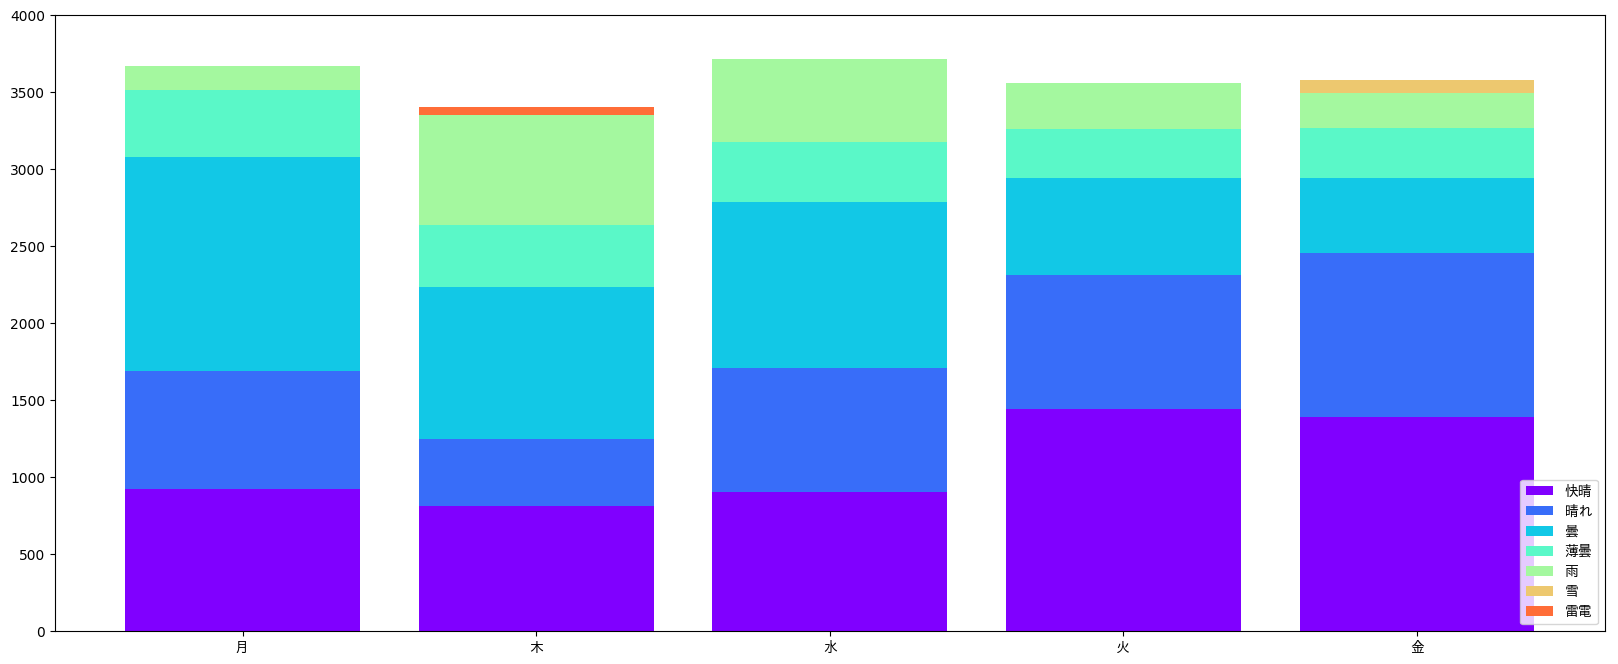

In [23]:
cmap = plt.get_cmap('rainbow')
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
y_old = 0
for i, weather in enumerate(df_week_weather_y_piv['weather']):
    # あるweatherを持つ行を抽出し、(week, y)の2列に変換
    df_tmp = df_week_weather_y_piv[df_week_weather_y_piv['weather'] == weather].drop('weather', axis=1).T.reset_index()
    df_tmp.columns = ['week', 'y']
    ax.bar(
        df_tmp['week'],
        df_tmp['y'],
        label=weather,
        color=cmap(i / len(df_week_weather_y_piv['weather'].unique())),
        bottom=y_old)
    y_old += df_tmp['y']

ax.legend(prop=font)
ax.set_xticklabels(df_tmp['week'], fontproperties=font)
ax.set_ylim(0, 4000)

plt.show()

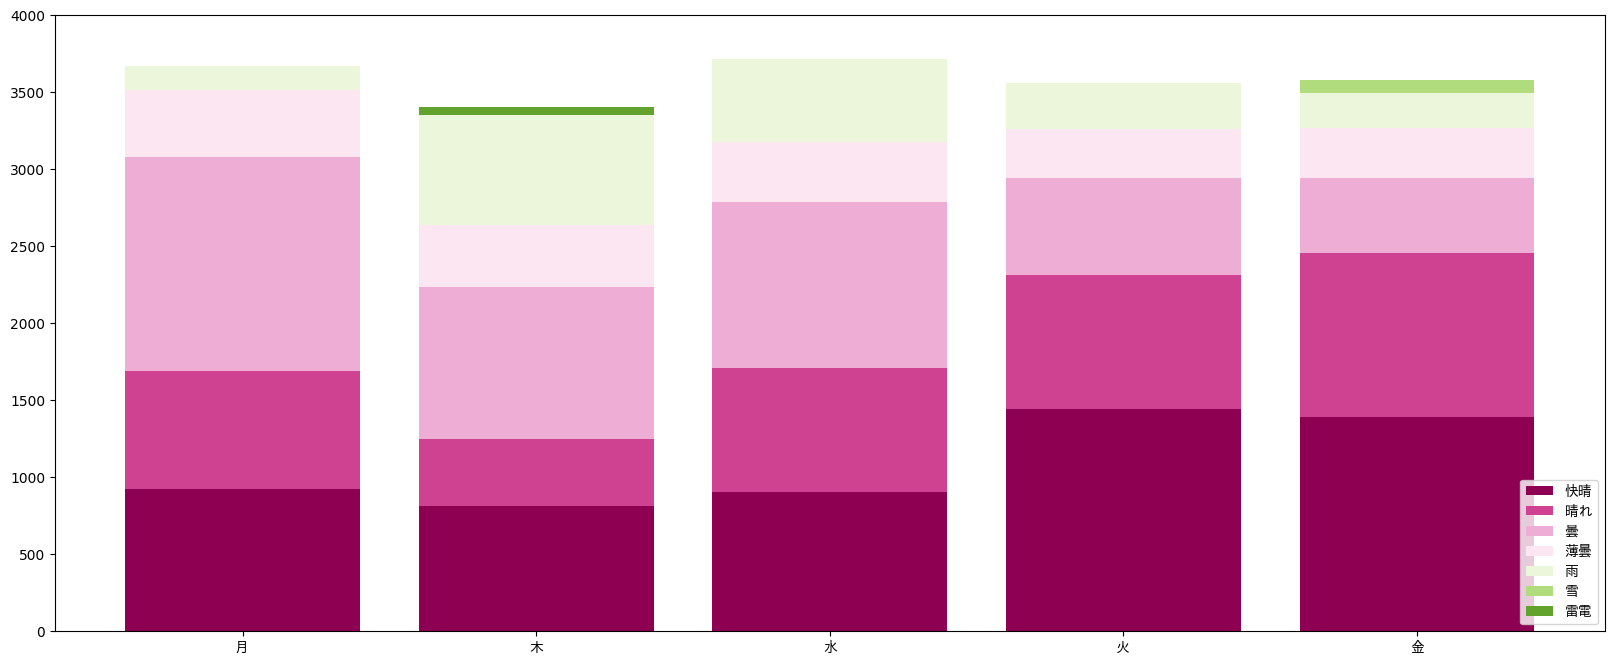

In [24]:
cmap = plt.get_cmap('PiYG')
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
y_old = 0
for i, weather in enumerate(df_week_weather_y_piv['weather']):
    # あるweatherを持つ行を抽出し、(week, y)の2列に変換
    df_tmp = df_week_weather_y_piv[df_week_weather_y_piv['weather'] == weather].drop('weather', axis=1).T.reset_index()
    df_tmp.columns = ['week', 'y']
    ax.bar(
        df_tmp['week'],
        df_tmp['y'],
        label=weather,
        color=cmap(i / len(df_week_weather_y_piv['weather'].unique())),
        bottom=y_old)
    y_old += df_tmp['y']

ax.legend(prop=font)
ax.set_xticklabels(df_tmp['week'], fontproperties=font)
ax.set_ylim(0, 4000)

plt.show()

# 100%積み上げ棒グラフ

Rだとgeom_bar()内にposition=“fill”を追加するだけでいけるが、matplotlibは厄介  
普通に、曜日毎の総和を出したテーブルをmergeして、割合を算出

In [25]:
df_week_weather_y = df.groupby(['week', 'weather'])['y'].sum().reset_index()
df_week_sum = df_week_weather_y.groupby(['week'])['y'].sum().reset_index()
df_week_sum.columns = ['week', 'sum_y']
df_week_weather_y = df_week_weather_y.merge(df_week_sum, on=['week'], how='left')
df_week_weather_y['y_ratio'] = df_week_weather_y['y'] / df_week_weather_y['sum_y']
df_week_weather_y

,week,weather,y,sum_y,y_ratio
0,月,快晴,921,3668,0.251091
1,月,晴れ,771,3668,0.210196
2,月,曇,1390,3668,0.378953
3,月,薄曇,430,3668,0.117230
4,月,雨,156,3668,0.042530
5,木,快晴,812,3404,0.238543
6,木,晴れ,439,3404,0.128966
7,木,曇,984,3404,0.289072
8,木,薄曇,402,3404,0.118096
9,木,雨,713,3404,0.209459


In [26]:
df_week_weather_y_piv = df_week_weather_y.pivot_table(index='weather', columns='week', values='y_ratio').reset_index()
df_week_weather_y_piv = df_week_weather_y_piv.fillna(0)
df_week_weather_y_piv

week,weather,月,木,水,火,金
0,快晴,0.251091,0.238543,0.243883,0.405565,0.388889
1,晴れ,0.210196,0.128966,0.215918,0.244519,0.297599
2,曇,0.378953,0.289072,0.289056,0.176504,0.134841
3,薄曇,0.117230,0.118096,0.104598,0.089376,0.090452
4,雨,0.042530,0.209459,0.146545,0.084036,0.064210
5,雪,0.000000,0.000000,0.000000,0.000000,0.024009
6,雷電,0.000000,0.015864,0.000000,0.000000,0.000000


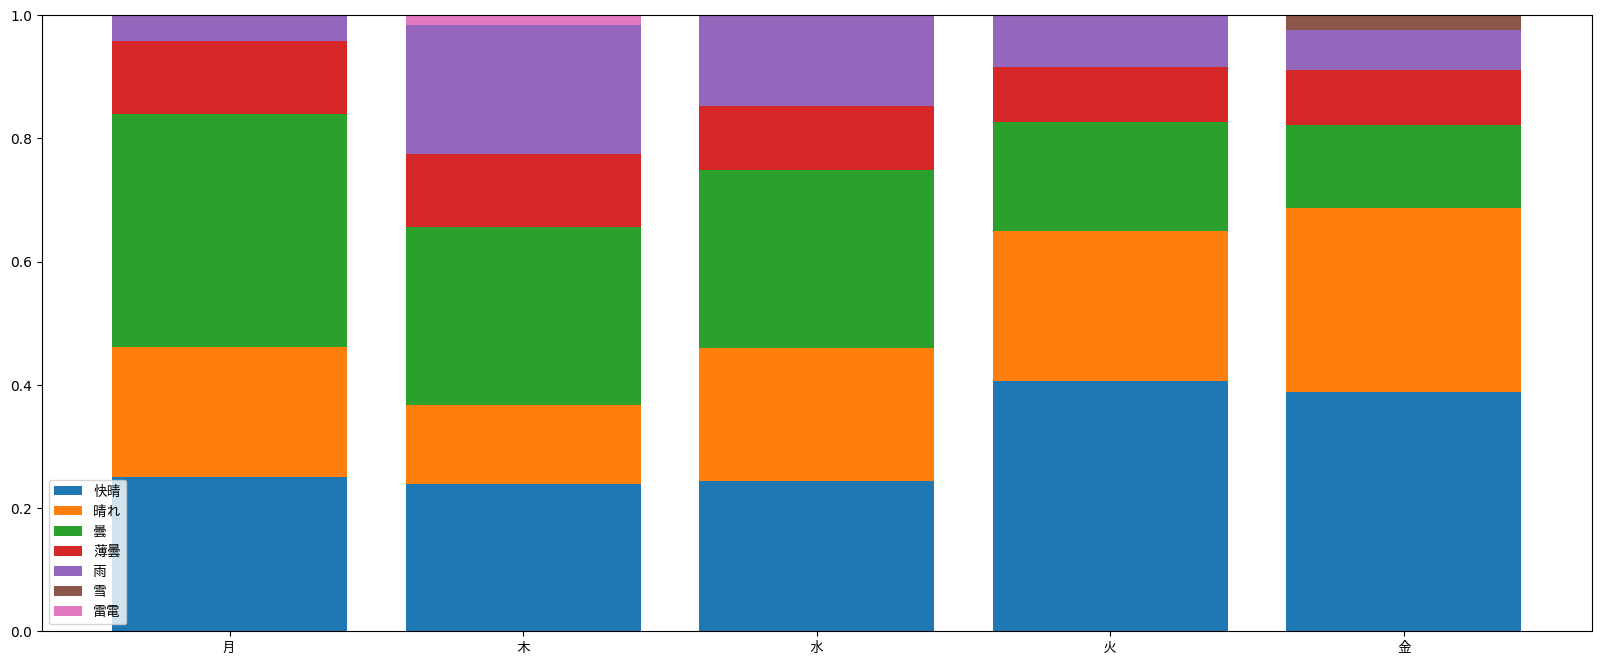

In [27]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
y_old = 0
for i, weather in enumerate(df_week_weather_y_piv['weather']):
    df_tmp = df_week_weather_y_piv[df_week_weather_y_piv['weather'] == weather].drop('weather', axis=1).T.reset_index()
    df_tmp.columns = ['week', 'y_ratio']
    ax.bar(
        df_tmp['week'],
        df_tmp['y_ratio'],
        label=weather,
        bottom=y_old)
    y_old += df_tmp['y_ratio']

ax.legend(prop=font)
ax.set_xticklabels(df_tmp['week'], fontproperties=font)
ax.set_ylim(0, 1)

plt.show()

# 積み上げではなく横に並べて表示


2つ説明をします

まず、横並びの可視化については、seabornのbarplotを使いました  (https://seaborn.pydata.org/generated/seaborn.barplot.html)  
barplotはretunがaxなので扱いやすいです。  
ちなみにRではgeom_bar()内にposition=“dodge”を追加することで横並びにできます

次に、matplotlib.pyplot.gca　です  (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html)  
現在のaxesの情報を取ってくるメソッドです。これにより「文字化けしていて読めないxticklabels()」を取得して、set_xticklabelsにフォントと一緒に渡すことで文字化けを解消しています。  
また、a = gca() とわかりにくい変数名を一般的に持用いるようです（axとの重複を避けるためと思われますが、気持ち悪いのが本音です）

In [28]:
df_week_weather_y = df.groupby(['week', 'weather'])['y'].sum().reset_index()

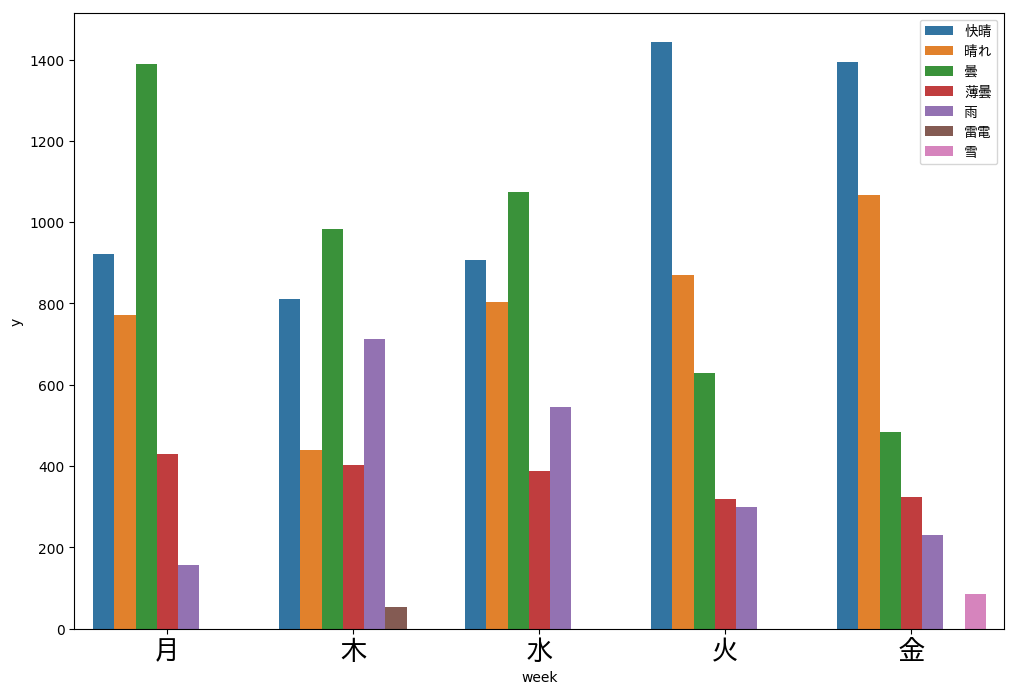

In [29]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax = sns.barplot(x="week", y="y", hue="weather", data=df_week_weather_y)
ax.ticklabel_format(axis='y', style='plain')

# 文字化け対策
a = gca()
a.set_xticklabels(a.get_xticklabels(),  fontproperties=font)
ax.tick_params(axis='x', labelsize=20)
ax.legend(prop=font)

# ヒストグラム

## matplotlib

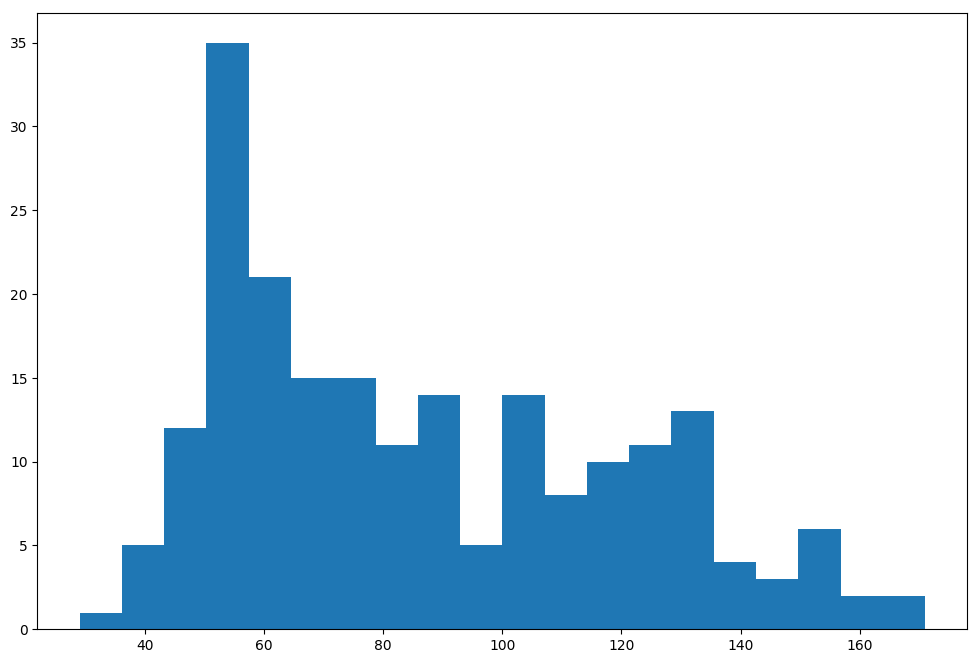

In [30]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df['y'],  bins=20)
plt.show()

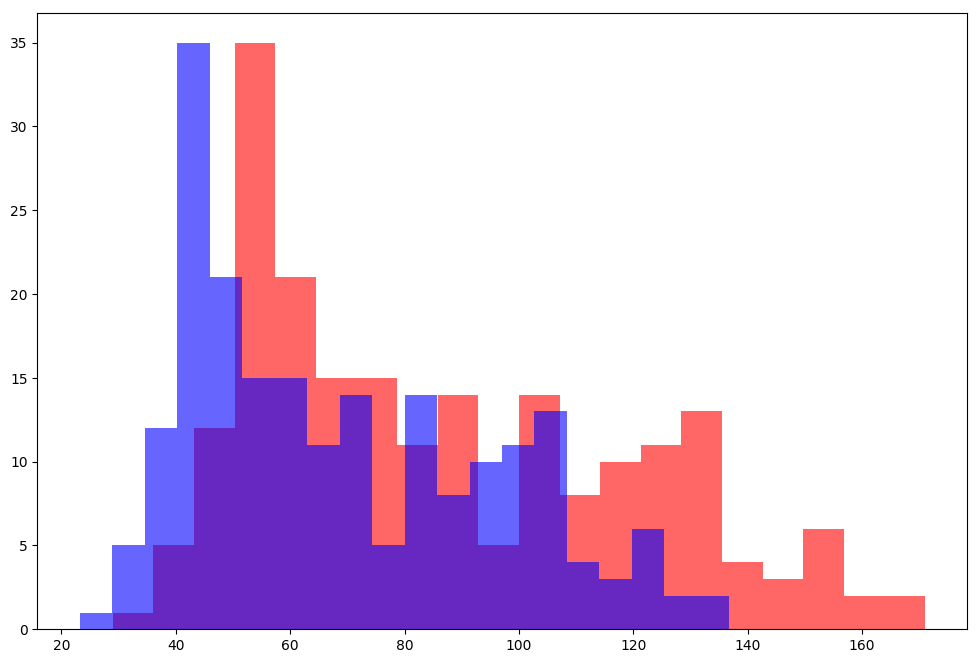

In [53]:
# 複数ヒストグラムを重ねるのは、同じaxに打てばいいだけなので簡単にできる
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df['y'],  bins=20, color='r', alpha=0.6)
ax.hist(df['y']*0.8,  bins=20, color='b', alpha=0.6)
plt.show()

## seaborn

https://seaborn.pydata.org/generated/seaborn.distplot.html  
kdeをFalseにしないと gaussian kernel densityになる

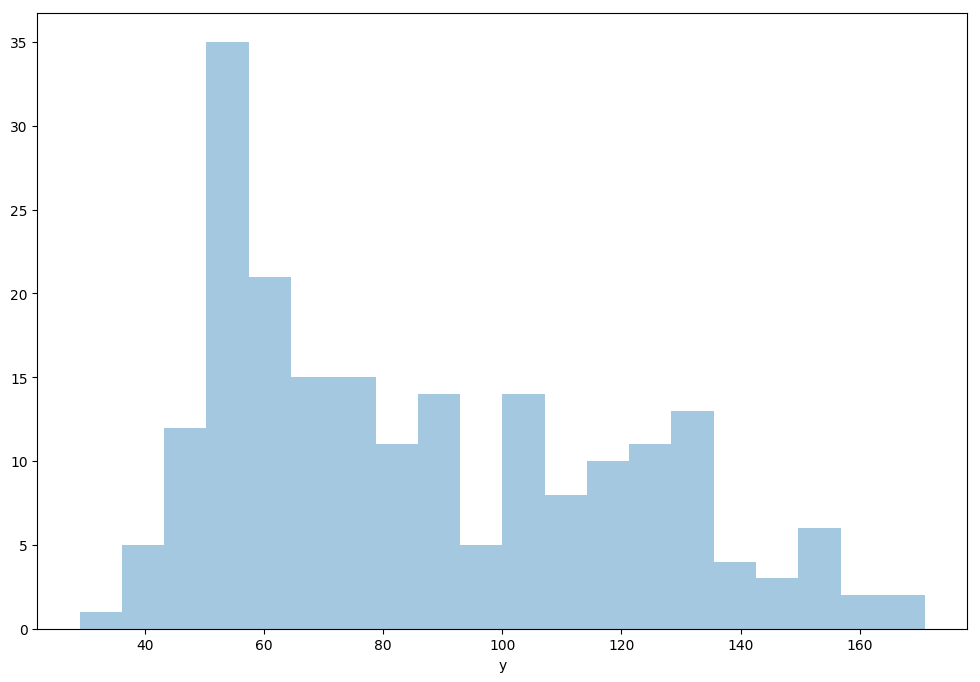

In [48]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax = sns.distplot(df['y'], bins=20, kde=False)

# 折れ線グラフ

## データ準備

月、曜日ごとのyのsum

In [69]:
df['date'] = pd.to_datetime(df['datetime'])
df['year_month'] = df['date'].apply(lambda x: pd.to_datetime((x.year * 100 + x.month * 1), format='%Y%m'))
df.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,date,year_month
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013-11-18,2013-11-01
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013-11-19,2013-11-01
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,2013-11-20,2013-11-01
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,2013-11-21,2013-11-01
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,2013-11-22,2013-11-01


In [75]:
df_year_month_weeek_y = df.groupby(['year_month', 'week'])['y'].sum().reset_index()
df_year_month_weeek_y

,year_month,week,y
0,2013-11-01,月,225
1,2013-11-01,木,271
2,2013-11-01,水,258
3,2013-11-01,火,246
4,2013-11-01,金,246
5,2013-12-01,月,476
6,2013-12-01,木,511
7,2013-12-01,水,574
8,2013-12-01,火,575
9,2013-12-01,金,379


## 折れ線グラフ

ax.plotで解決

/Users/masato.ninohira/.pyenv/versions/3.5.6/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


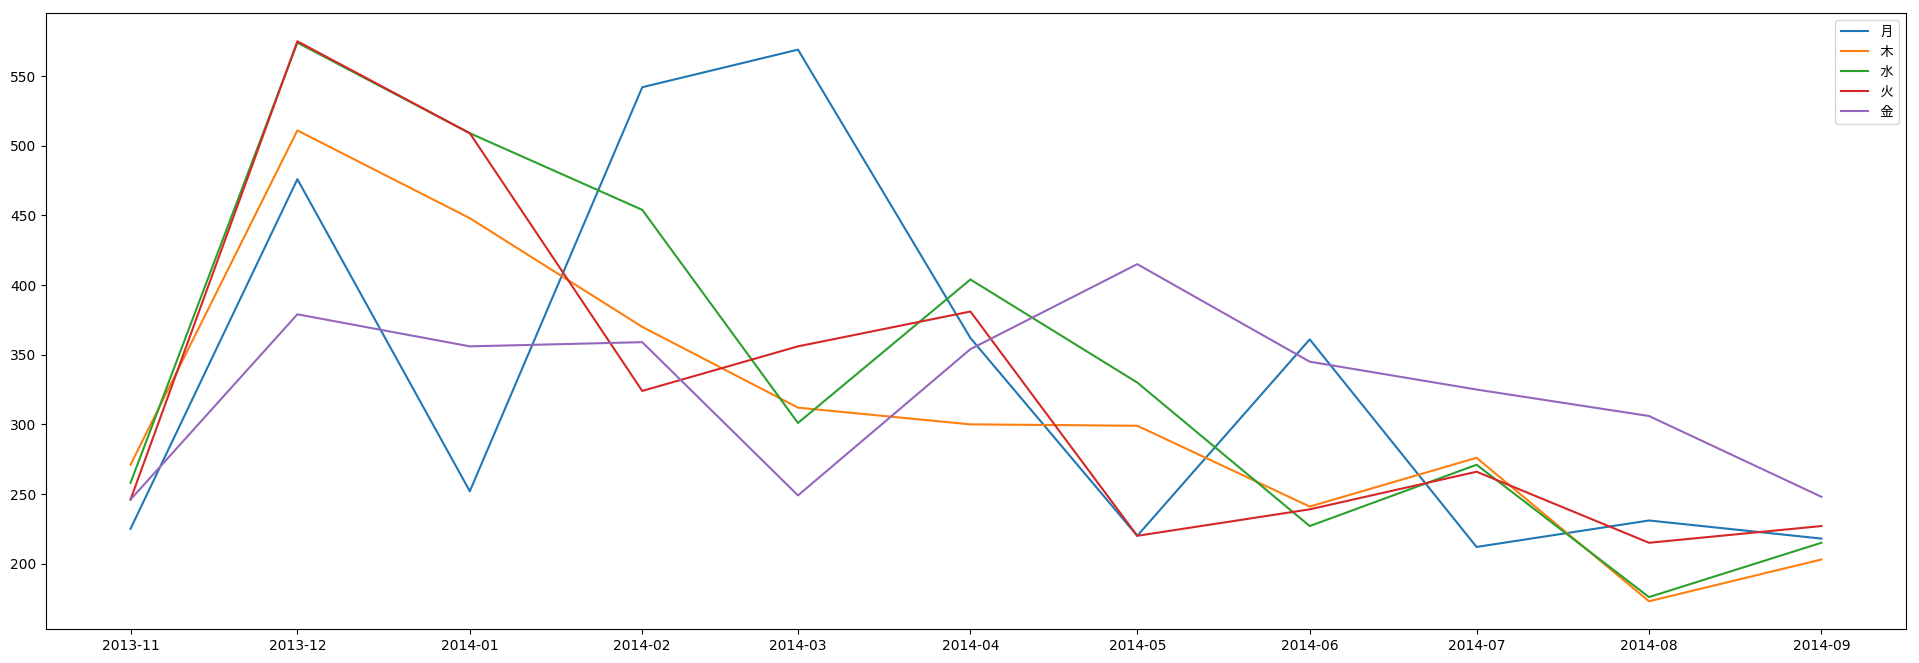

In [79]:
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1) 
for week in df_year_month_weeek_y['week'].unique():
    df_tmp = df_year_month_weeek_y[df_year_month_weeek_y['week'] == week].sort_values('year_month')
    ax.plot(df_tmp['year_month'], df_tmp['y'], label=week)
ax.legend(prop=font)

# 時系列プロットの横軸の書式・間隔を変更したい

表示
- ax.xaxis.set_major_formatterにformatを引き渡す
  - (日付以外のformatもある)
  - https://matplotlib.org/gallery/ticks_and_spines/tick-formatters.html  
- 日付用のformatterとしてmatplotlib.dates.DateFormatterなるものがある
  - https://matplotlib.org/api/dates_api.html
  - あとは&Yとか%mとかを駆使してお好みのformatを作る

間隔
- ax.xaxis.set_major_locatorにlocatorを引き渡す
  - https://matplotlib.org/api/ticker_api.html
- 日付用のlocatorとしてmatplotlib.dates.MonthLocatorなどがある
  - https://matplotlib.org/api/dates_api.html

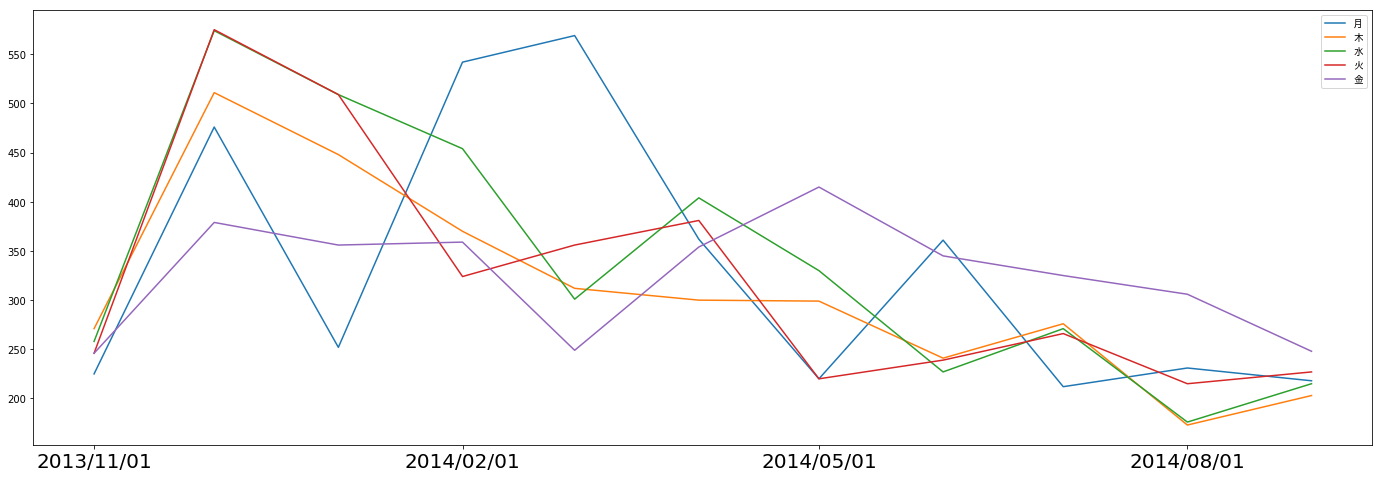

In [90]:
monthFmt = mdates.DateFormatter('%Y/%m/%d')
montLoc = mdates.MonthLocator(interval=3)

fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1) 
for week in df_year_month_weeek_y['week'].unique():
    df_tmp = df_year_month_weeek_y[df_year_month_weeek_y['week'] == week].sort_values('year_month')
    ax.plot(df_tmp['year_month'], df_tmp['y'], label=week)
ax.legend(prop=font)
ax.xaxis.set_major_formatter(monthFmt)
ax.xaxis.set_major_locator(montLoc)
ax.tick_params(axis='x', labelsize=20)
plt.show()

# 凡例の位置を変える

ax.legendの引数のlocで解決(location)  
https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.legend.html

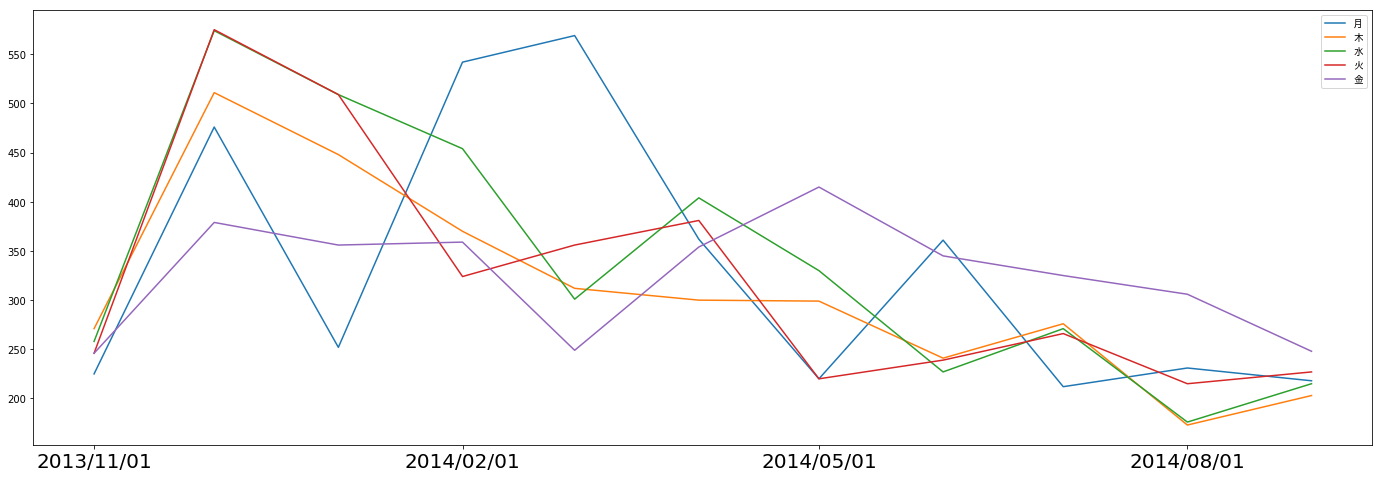

In [92]:
monthFmt = mdates.DateFormatter('%Y/%m/%d')
montLoc = mdates.MonthLocator(interval=3)

fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
for week in df_year_month_weeek_y['week'].unique():
    df_tmp = df_year_month_weeek_y[df_year_month_weeek_y['week'] == week].sort_values('year_month')
    ax.plot(df_tmp['year_month'], df_tmp['y'], label=week)
ax.legend(prop=font, loc='upper right')
ax.xaxis.set_major_formatter(monthFmt)
ax.xaxis.set_major_locator(montLoc)
ax.tick_params(axis='x', labelsize=20)
plt.show()

# 凡例の大きさを変える

ax.legendのpropで変更  
https://matplotlib.org/api/font_manager_api.html#matplotlib.font_manager.FontProperties

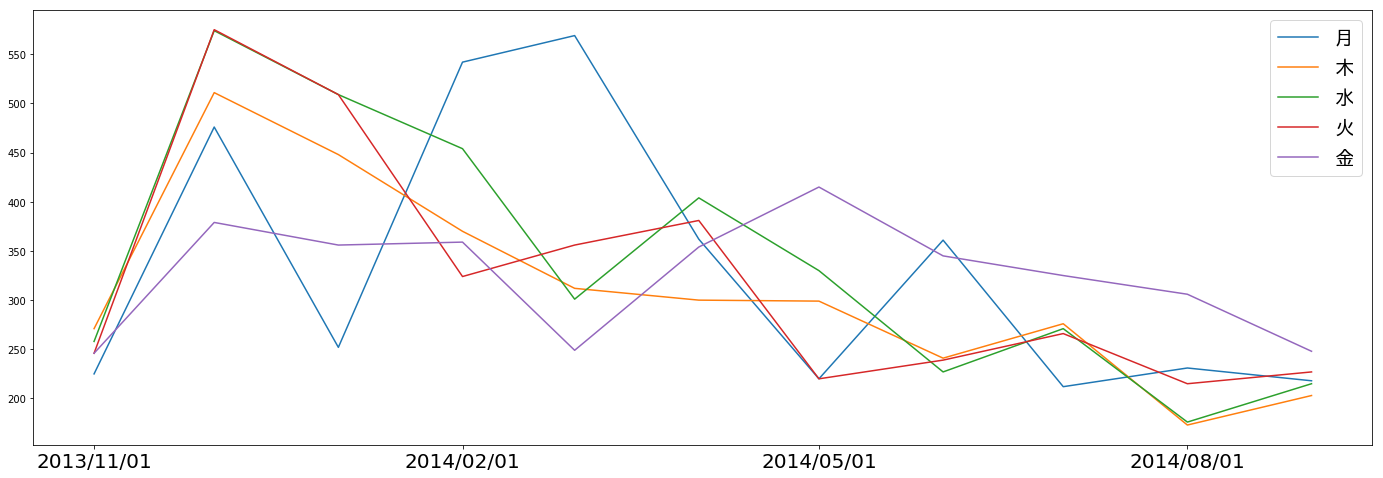

In [95]:
monthFmt = mdates.DateFormatter('%Y/%m/%d')
montLoc = mdates.MonthLocator(interval=3)

fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
for week in df_year_month_weeek_y['week'].unique():
    df_tmp = df_year_month_weeek_y[df_year_month_weeek_y['week'] == week].sort_values('year_month')
    ax.plot(df_tmp['year_month'], df_tmp['y'], label=week)
ax.legend(prop={'size': 20, 'fname': './TakaoPGothic.ttf'},  loc='upper right')
ax.xaxis.set_major_formatter(monthFmt)
ax.xaxis.set_major_locator(montLoc)
ax.tick_params(axis='x', labelsize=20)
plt.show()

# 判例のタイトル

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_title.html で解決

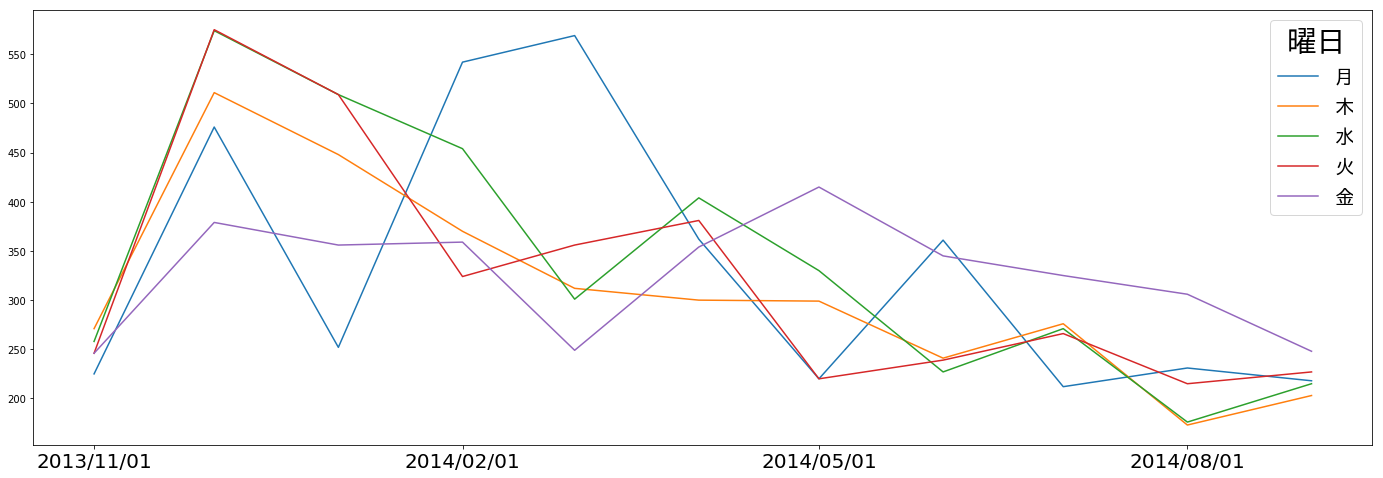

In [101]:
monthFmt = mdates.DateFormatter('%Y/%m/%d')
montLoc = mdates.MonthLocator(interval=3)

fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
for week in df_year_month_weeek_y['week'].unique():
    df_tmp = df_year_month_weeek_y[df_year_month_weeek_y['week'] == week].sort_values('year_month')
    ax.plot(df_tmp['year_month'], df_tmp['y'], label=week)
ax.legend(prop={'size': 20, 'fname': './TakaoPGothic.ttf'},  loc='upper right')
ax.legend_.set_title('曜日', prop={'size': 30, 'fname': './TakaoPGothic.ttf'})
ax.xaxis.set_major_formatter(monthFmt)
ax.xaxis.set_major_locator(montLoc)
ax.tick_params(axis='x', labelsize=20)
plt.show()

# その他知っておくと便利な事項

- axにtitileを付与
  - matplotlib.axes.Axes.set_title
  - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html


- figにtitileを付ける
  - matplotlib.pyplot.suptitle
  - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.suptitle.html


- x軸の範囲を絞る
   - matplotlib.axes.Axes.set_xlim
   - https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html
   - yも同様: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_ylim.html  


- 図を無理やり指定の大きさに収める
   - matplotlib.pyplot.tight_layout
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.tight_layout.html
   - それなりの頻度で使う


 - seabooorのギャラリー
   - https://seaborn.pydata.org/examples/index.html
   - 使えそうな物があるか一応確認する
